In [ ]:
import numpy as np
# import argparse
import os
import sys
import torch
import torch.fft as F
from importlib import reload
from torch.nn.functional import relu
import torch.nn as nn
import torch.nn.functional as Func
import torch.optim as optim
import utils
from utils import *

from matplotlib import pyplot as plt
import random
import copy
# from sklearn.model_selection import train_test_split

import skimage
from MoDL.MoDL import *
from mnet import MNet
from unet.unet_model import UNet
from unet.unet_model_fbr import Unet
from unet.unet_model_banding_removal_fbr import UnetModel

torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

Namespace(base_freq=8, batchind_start=0, batchsize=5, budget=32, chans=32, epoch_start=0, epochs=30, histpath=None, in_chans=2, lr=1e-05, lrwd=0, mnetpath='/mnt/shared_a/checkpoints/leo/mri/mnet_split_trained_cf_8_bg_32_unet_in_chan_1_epoch_9.pt', mode='rand', ngpu=1, seed=0, skip='False', unetpath=None, utype=2, val_batchsize=5)
MNet loaded successfully from: /mnt/shared_a/checkpoints/leo/mri/mnet_split_trained_cf_8_bg_32_unet_in_chan_1_epoch_9.pt
> /home/huangz78/mri/MoDL/MoDL.py(123)validate()
    121                 MoDL_res = self.model(databatch,smap,maskbatch)
    122                 breakpoint()
--> 123                 loss = lpnorm(MoDL_res, label, mode='mean')
    124                 valloss += loss.item()
    125                 batchind += 1

ipdb> from utils import kplot
ipdb> kplot(MoDL_res[0,0,:,:].cpu())


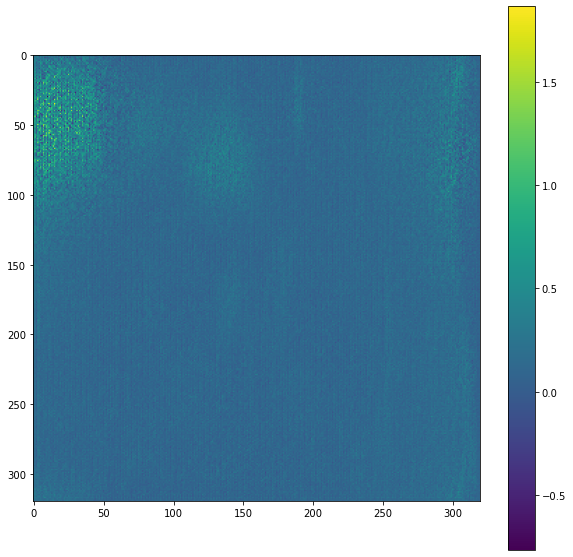

ipdb> n
> /home/huangz78/mri/MoDL/MoDL.py(124)validate()
    122                 breakpoint()
    123                 loss = lpnorm(MoDL_res, label, mode='mean')
--> 124                 valloss += loss.item()
    125                 batchind += 1
    126             self.val_loss.append(valloss/batchnums)

ipdb> p loss
tensor(inf, device='cuda:0')
ipdb> q


BdbQuit: 

In [1]:
%run modl_train.py -m rand

In [ ]:
from modl_train import prepare_data

In [ ]:
train_in, train_label, train_mask, val_in, val_label, val_mask = prepare_data(mode='rand', base=8, budget=24,batchsize=5,unet_inchans=2,datatype=torch.float,device='cuda:0')

In [ ]:
modl = MoDL(CG_steps=6,CG_tol=5e-5)

In [ ]:
data = train_in[0:2,:,:,:]
smap = torch.ones(data.shape[0],1,data.shape[1],data.shape[2],data.shape[3])
mask = torch.ones(data.shape)

In [ ]:
with torch.no_grad():
    x_out = modl(data,smap,mask)
plt.figure()
plt.imshow(x_out[0,0,:,:])
plt.colorbar()
plt.show()

In [ ]:
lpnorm(x_out,data,mode='mean')

In [ ]:
for name, param in modl.named_parameters():
    if param.requires_grad:
        print(name)